# 지도학습 KNN

k-최근접 이웃 알고리즘이 회귀에도 작동, 이 알고리즘의 분류와 회귀에 적용되는 방식을 비교하겠다.

<img src='https://i.imgur.com/E7HrgBu.jpeg' width=600>



k-최근접 이웃 분류 알고리즘은 간단하다. 

> 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 그 다음 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측한다. 쉽게 말하면 C 주변에 A 가 1개, B 가 2개 일경우 C == B 다 라는 공식을 이용한다는 말이다.


k-최근접 이웃 회귀도 간단하다. 

> 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 회귀에서 이웃한 샘플의 수치를 사용해 새로운 샘플 X의 타깃을 예측하는 간단한 방법을 사용한다. 대상 수치들의 평균을 구하면 된다. 얘도 X의 수가 있다면 주변에 100, 80, 60일 경우 X 의 값은 저 숫자들의 평균인 80이 된다.

<img src='https://i.imgur.com/SeyS4X1.png' width=600>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. KNN 회귀

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

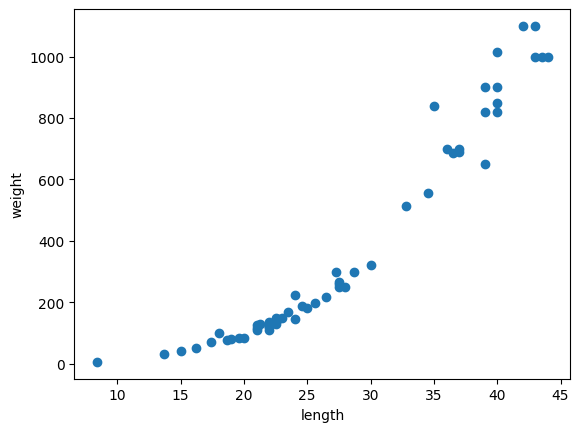

In [3]:
# 산점도
plt.scatter(perch_length, perch_weight, label='Data')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
np.min(perch_length), np.max(perch_length)

(8.4, 44.0)

In [5]:
np.min(perch_weight), np.max(perch_weight)

(5.9, 1100.0)

In [6]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, test_size=0.3, random_state=50)

2차원 데이터로 변환한다.

In [7]:
X_train.shape, X_test.shape

((39,), (17,))

In [8]:
# 배열 크기 바꾸기
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

print(X_train.shape, X_test.shape)

(39, 1) (17, 1)


이제 준비한 훈련 세트를 활용하여 k-최근접 이웃 알고리즘을 훈련 시켜보자.


### 학습 평가


In [9]:
from sklearn.neighbors import KNeighborsRegressor # k-최근접 이웃 회귀 알고리즘

knn = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다.
knn.fit(X_train, y_train)

KNeighborsRegressor()

분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이다. 이걸 정확도라고 불렀었다. 간단하게 말하면 정답을 맞힌 개수의 비율인 것이다. 근데 회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능하다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다.

In [10]:
print('Test set: ', knn.score(X_test, y_test))

Test set:  0.969018362185958


In [11]:
pred_test = knn.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 타깃과 예측의 절댓값 오차를 평균하여 변환

# 테스트 세트에 대한 예측을 만든다.
print('MAE : ', mean_absolute_error(y_test, pred_test))
print('MSE : ', mean_squared_error(y_test, pred_test))
print('R2 : ', r2_score(y_test, pred_test))

MAE :  46.288235294117655
MSE :  4008.280588235295
R2 :  0.969018362185958


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다. 지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했었다. 그런데 훈련 세트를 사용해 평가해보면 어떻게 될까? 즉 score() 메소드에 훈련 세트를 전달해서 점수를 출력해 보는것이다. 점수를 출력해보자.

### 정규화 사용

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)

In [15]:
train_scaled[:5]

array([[-0.64840285],
       [-0.35558544],
       [-0.29702196],
       [-1.21061226],
       [ 0.40573981]])

In [16]:
knn2 = KNeighborsRegressor()
knn2.fit(train_scaled, y_train)

KNeighborsRegressor()

In [19]:
print('Test set: ', knn2.score(test_scaled, y_test))

Test set:  0.6335664641454674


In [20]:
pred_test = knn2.predict(test_scaled)

In [21]:
# 테스트 세트에 대한 예측을 만든다.
print('MAE : ', mean_absolute_error(y_test, pred_test))
print('MSE : ', mean_squared_error(y_test, pred_test))
print('R2 : ', r2_score(y_test, pred_test))

MAE :  169.32235294117646
MSE :  47407.707670588235
R2 :  0.6335664641454674


### 과대적합과 과소적합

테스트 세트를 사용한 점수와 비교해봐라. 어떤 값이 더 높은가? 훈련 세트에서 나온 점수가 테스트 세트에서 나온 점수보다 현저히 낮지 않은가? 이상하지 않나? 왜 이런 결과가 나온걸까? 모델을 훈련 세트에서 훈련하면 훈련 세트에 잘 맞는 모델이 만들어지는게 당연하다. 그럼 이 모델을 훈련 세트와 테스트 세트에서 평가하면 두 값 중 어느 것이 높아야 정상인가? 보통은 훈련 세트에서 테스트 했던게 조금 더 높게 나와야 할 것이다. 

만약에 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁘다면?

모델이 훈련 세트에 **과대적합(overfitting)** 되었다고 말한다. 즉 훈련 세트에서만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들때 잘 동작하지 않는다는 것이다. 이런 모델은 나 말고도 클라이언트또한 원하지 않는 모델이겠다.

반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우는 어떨까? 

이런 경우를 모델이 훈련 세트에 **과소적합(underfitting)** 되었다고 말한다. 즉 모델이 너무 단순해서 훈련 세트에 적절히 훈련되지 않은 경우이다. 훈련 세트가 젠체 대이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습 하는것이 중요하다.


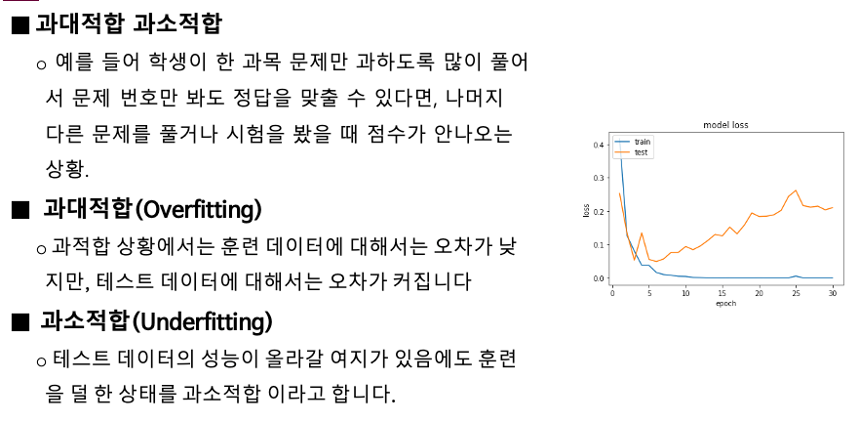

우리의 모델의 경우 훈련 세트보다 테스트 세트의 점수가 높으니 과소적합이다. 과소적합을 해소하려면 모델을 조금 더 복잡하게 만들면 된다. 즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다. k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것이다.


In [ ]:
# 과대적합 vs 과소적합


# 모델을 다시 훈련시킵니다.



print("훈련 세트 정확도:", knr.score(train_input, train_target))
print("테스트 세트 정확도:",knr.score(test_input, test_target))

예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결한 듯 싶다. 또 두 수의 차이가 그렇게 큰 것도 아니니 과대적합이 된것도 아닌듯 하다.


이웃 n = 1,5,10일 때 예측 결과를 그래프 그려보자

In [ ]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

# n = 1,5,10일 때 예측 결과를 그래프로 그립니다
for n in [1,5,10]:

# 지정한 범위 x에 대한 예측을 구합니다.

plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 데이터 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
# scaler = StandardScaler()

In [ ]:
# train , test scaling


In [ ]:


# 모델을 다시 훈련시킵니다.
# knr2.n_neighbors = 5


print("훈련 세트 정확도:", knr2.score(train_scaled, train_target))
print("테스트 세트 정확도:",knr2.score(test_scaled, test_target))

스케일 없이 훈련 스코어:

```
훈련 세트 정확도: 0.9698823289099254
test 세트 정확도: 0.992809406101064
```

# 2. KNN 분류 

Wine data를 KNN 알고리즘으로 시도해 보자

와인데이터

In [ ]:
from sklearn.datasets import load_wine



In [ ]:
# wine 데이터의 feature, target로 Dataframe을 만든다.


# feature 만 있는 데이터 프레임에 타겟 데이터를 추가한다.




In [ ]:
# target에 class 이름 매핑 




In [ ]:
# class 필드




In [ ]:
# class 별 개수




In [ ]:
# 정규화 수행

# 



In [ ]:
# 데이터세트에서 훈련데이터와 타겟데이터 분리 



In [ ]:
X_train.shape, y_train.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


